# ESA TRAINING COURSE, SNOW COVER EXTENT

During this exercise we will use Optical Multispectral data for mapping snow cover.

In that specific case we will use a **Sentinel-2** scene.

## Data Visualization on Qgis

1. Open QGIS
2. ktm

## Getting Started

First, let's load the necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from osgeo import gdal
import glob
import rasterio
import os
import numpy as np

***

## Read image

The bands are stored in the folder **S2B_MSIL1C_20201125T103349_N0209_R108_T32TLR_20201125T114106_10m**

## Explore bands

Now you have 10 minutes to get familiar with the Sentinel-2 bands.
Try to read and look inside each band.

- What do you notice? What is the snow and other classes behaviour?
- Which bands do you think are giving the most information about snow cover?

Use the table and the image for orientating through the bands.

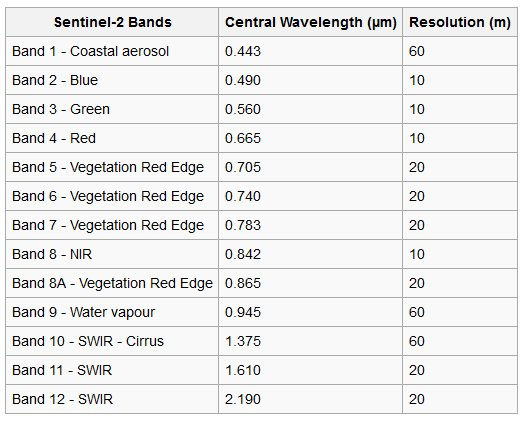

./S2B_MSIL1C_20201125T103349_N0209_R108_T32TLR_20201125T114106_10m/T32TLR_20201125T103349_B11_toa.tif


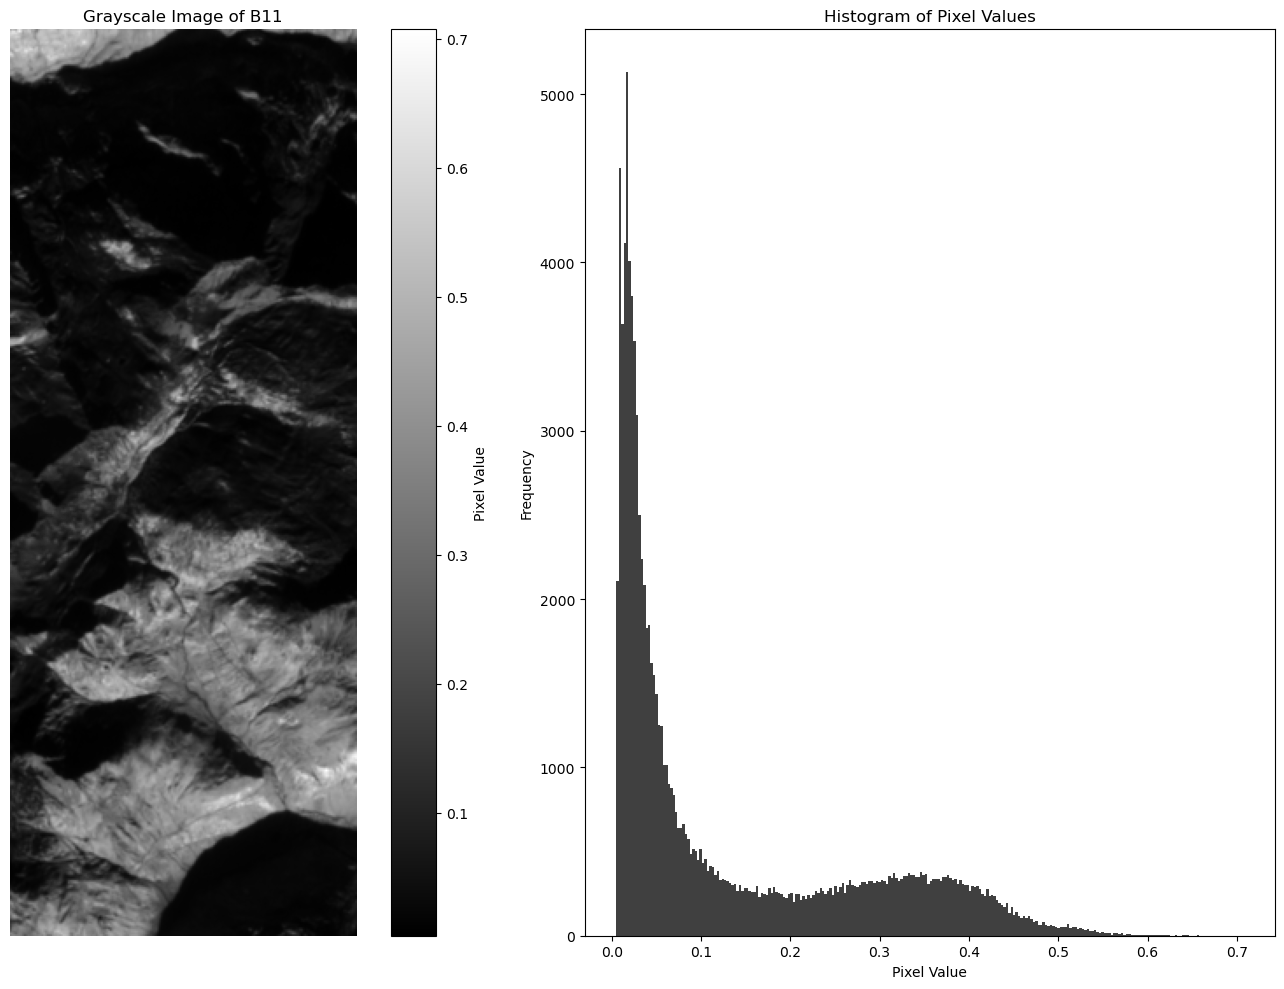

In [13]:
# Define the specific band name you're interested in analyzing
current_band_name = 'B11'

# Get the current working directory to establish the starting point for the search
current_dir = os.getcwd()

# Use glob to search for the specific TIFF file that matches the band name (B11) within subdirectories
# './S2*' matches directories starting with 'S2' (e.g., Sentinel-2 data folders)
# '*' + current_band_name + '*.tif' matches any TIFF file that contains the band name in its filename
current_band_path = glob.glob(os.path.join('./S2*', '*' + current_band_name + '*.tif'))[0]

# Print the full path to the identified file for confirmation
print(current_band_path)

# Open the identified image file using rasterio, which handles geospatial raster data
with rasterio.open(current_band_path) as dataset:
    # Read the first (and typically only) band of the image as a 2D array
    band = dataset.read(1)
    
    # Create a figure with two subplots arranged in one row and two columns
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))  # Adjust figure size as needed
    
    # Plot the image data in grayscale on the first subplot
    img_plot = ax[0].imshow(band, cmap='gray')  # cmap='gray' ensures the image is displayed in grayscale
    ax[0].set_title(f'Grayscale Image of {current_band_name}')  # Set a title indicating which band is shown
    ax[0].axis('off')  # Remove the axis labels for a cleaner image display
    
    # Add a colorbar to the grayscale image for reference, indicating the range of pixel values
    cbar = plt.colorbar(img_plot, ax=ax[0], orientation='vertical')
    cbar.set_label('Pixel Value')  # Label the colorbar to explain what the values represent

    # Plot the histogram of pixel values on the second subplot
    # .ravel() flattens the 2D array into a 1D array of pixel values for histogram creation
    ax[1].hist(band.ravel(), bins=256, color='black', alpha=0.75)
    ax[1].set_title('Histogram of Pixel Values')  # Title for the histogram plot
    ax[1].set_xlabel('Pixel Value')  # X-axis label indicating pixel intensity levels
    ax[1].set_ylabel('Frequency')  # Y-axis label indicating how often each pixel value occurs

    # Use tight_layout() to adjust subplots to fit into the figure area neatly
    plt.tight_layout()
    
    # Display the entire figure with both plots (image and histogram)
    plt.show()



*** 

RGB composites help us to visually better interprete the scene. 

Use the consideratins you did before to combine different bands for creating a good combination for visualization

***

### NDSI (Normalized Difference Snow Index)

The NDSI is a widely used index for detecting snow cover, and it is calculated using the following formula:

$$
\text{NDSI} = \frac{\text{Green} - \text{SWIR}}{\text{Green} + \text{SWIR}}
$$

Where:
- **Green**: Reflectance in the green band.
- **SWIR**: Reflectance in the short-wave infrared (SWIR) band.

## NDSI computation

Given that NDSI definition now use the next script for reading the green and SWIR bands and compute NDSI.

## Analysis of the results

- Try now in the next 10 minutes to critically discuss what you see.
- What may be the main issues of using NDSI for snow detection?

Green Band Path: ./S2B_MSIL1C_20201125T103349_N0209_R108_T32TLR_20201125T114106_10m/T32TLR_20201125T103349_B03_toa.tif
SWIR Band Path: ./S2B_MSIL1C_20201125T103349_N0209_R108_T32TLR_20201125T114106_10m/T32TLR_20201125T103349_B11_toa.tif


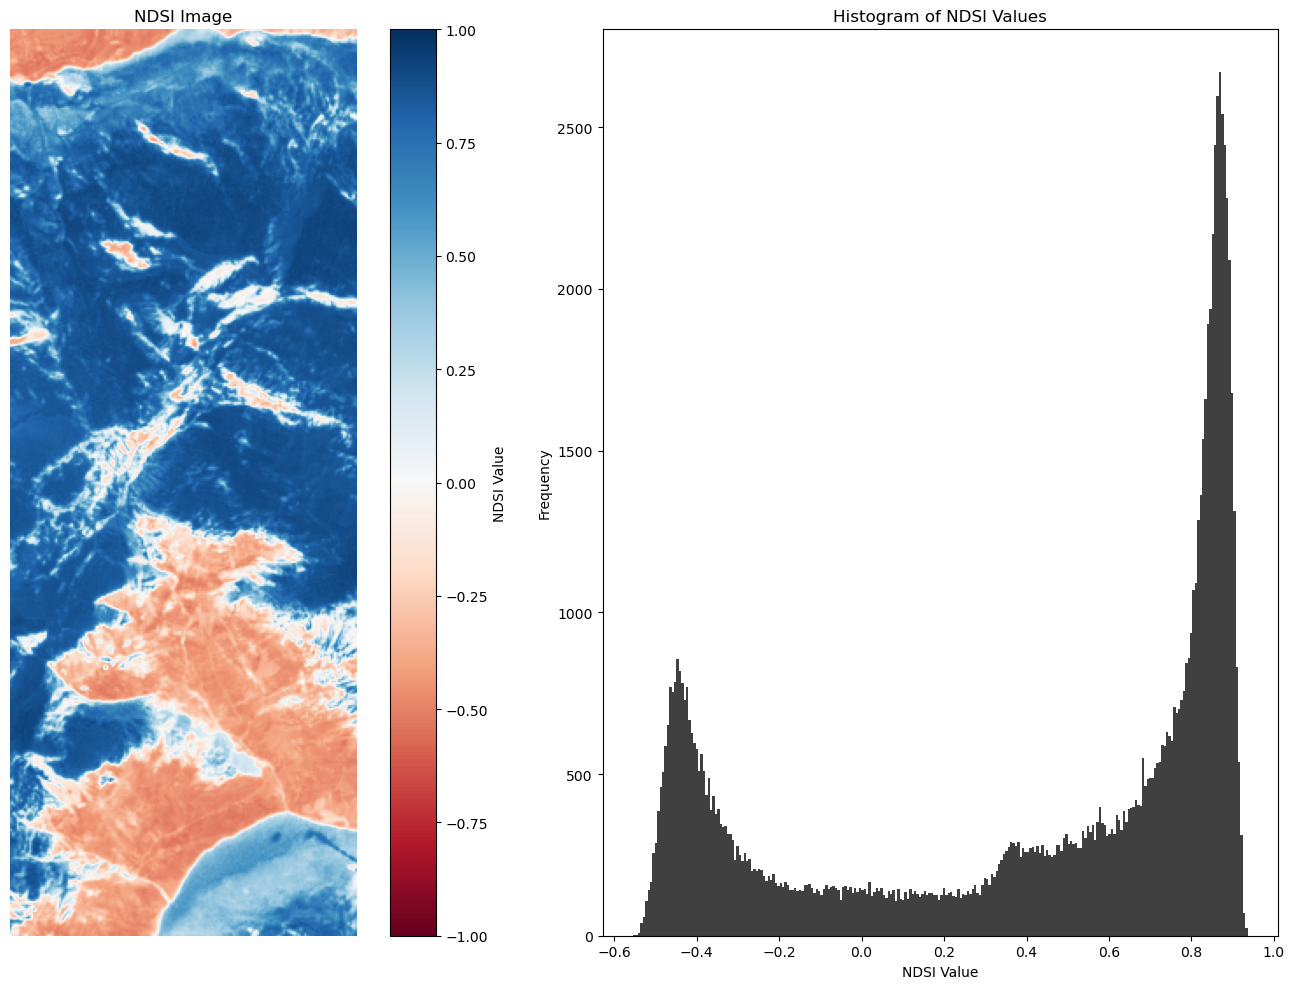

In [14]:
# Define the band names for green and SWIR bands
green_band_name = 'B03'
swir_band_name = 'B11'

# Get the current working directory
current_dir = os.getcwd()

# Use glob to find the paths for the green and SWIR band files
green_band_path = glob.glob(os.path.join('./S2*', '*' + green_band_name + '*.tif'))[0]
swir_band_path = glob.glob(os.path.join('./S2*', '*' + swir_band_name + '*.tif'))[0]

print(f"Green Band Path: {green_band_path}")
print(f"SWIR Band Path: {swir_band_path}")

# Open and read the green and SWIR bands
with rasterio.open(green_band_path) as green_dataset, rasterio.open(swir_band_path) as swir_dataset:
    # Read the first band from each image
    green_band = green_dataset.read(1)
    swir_band = swir_dataset.read(1)

    # Calculate the NDSI using the formula: (Green - SWIR) / (Green + SWIR)
    ndsi = (green_band.astype(float) - swir_band.astype(float)) / (green_band + swir_band)

    # Handle division by zero or other invalid values (like NaN or Inf)
    ndsi = np.where(np.isfinite(ndsi), ndsi, np.nan)

    # Create a figure with two subplots: one for the NDSI image and one for the histogram
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    
    # Plot the NDSI image with a colorbar
    img_plot = ax[0].imshow(ndsi, cmap='RdBu', vmin=-1, vmax=1)  # RdBu colormap is useful for NDSI (snow vs no-snow)
    ax[0].set_title('NDSI Image')
    ax[0].axis('off')
    
    # Add a colorbar to the NDSI image
    cbar = plt.colorbar(img_plot, ax=ax[0], orientation='vertical')
    cbar.set_label('NDSI Value')

    # Plot the histogram of NDSI values
    ax[1].hist(ndsi.ravel(), bins=256, color='black', alpha=0.75)
    ax[1].set_title('Histogram of NDSI Values')
    ax[1].set_xlabel('NDSI Value')
    ax[1].set_ylabel('Frequency')

    # Display the plots
    plt.tight_layout()
    plt.show()


***

## Snow mapping applying a threshold on NDSI

Now considering the NDSI map and the relative histogram please select a proper threshold for distinguishing between snow covered and snow free areas.

- Play a bit with the threshold and observe the result
- Critically analyze what can be the main issues using NDSI thresold for snow mapping

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Red Band Path: ./S2B_MSIL1C_20201125T103349_N0209_R108_T32TLR_20201125T114106_10m/T32TLR_20201125T103349_B04_toa.tif
Green Band Path: ./S2B_MSIL1C_20201125T103349_N0209_R108_T32TLR_20201125T114106_10m/T32TLR_20201125T103349_B03_toa.tif
Blue Band Path: ./S2B_MSIL1C_20201125T103349_N0209_R108_T32TLR_20201125T114106_10m/T32TLR_20201125T103349_B02_toa.tif
SWIR Band Path: ./S2B_MSIL1C_20201125T103349_N0209_R108_T32TLR_20201125T114106_10m/T32TLR_20201125T103349_B11_toa.tif


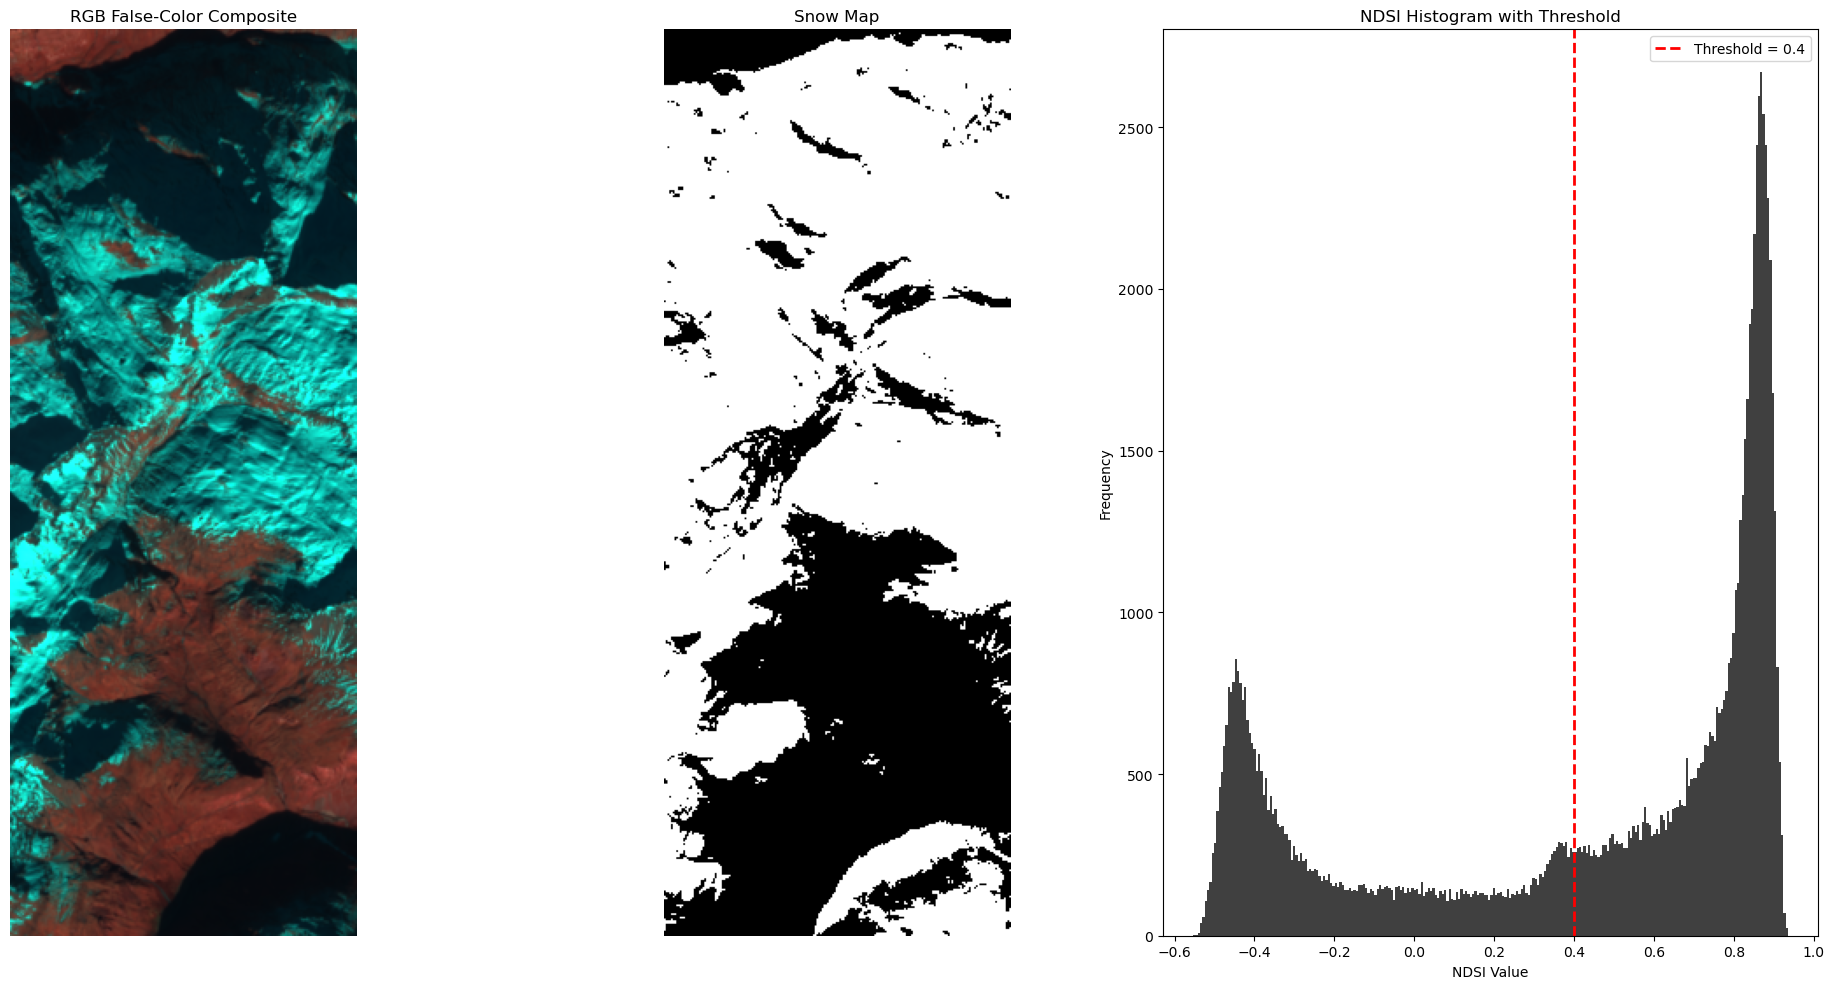

In [16]:
# Define an NDSI threshold for snow mapping (students can modify this value)
ndsi_threshold = 0.4  # Example threshold, students can experiment with different values

# Define the band names for RGB (false color), Green, and SWIR bands
red_band_name = 'B04'
green_band_name = 'B03'
blue_band_name = 'B02'
swir_band_name = 'B11'

# Get the current working directory
current_dir = os.getcwd()

# Use glob to find the paths for the necessary bands
red_band_path = glob.glob(os.path.join('./S2*', '*' + red_band_name + '*.tif'))[0]
green_band_path = glob.glob(os.path.join('./S2*', '*' + green_band_name + '*.tif'))[0]
blue_band_path = glob.glob(os.path.join('./S2*', '*' + blue_band_name + '*.tif'))[0]
swir_band_path = glob.glob(os.path.join('./S2*', '*' + swir_band_name + '*.tif'))[0]

print(f"Red Band Path: {red_band_path}")
print(f"Green Band Path: {green_band_path}")
print(f"Blue Band Path: {blue_band_path}")
print(f"SWIR Band Path: {swir_band_path}")

# Open and read the RGB and SWIR bands
with rasterio.open(red_band_path) as red_dataset, \
     rasterio.open(green_band_path) as green_dataset, \
     rasterio.open(blue_band_path) as blue_dataset, \
     rasterio.open(swir_band_path) as swir_dataset:
    
    # Read the bands as 2D arrays
    red_band = red_dataset.read(1)
    green_band = green_dataset.read(1)
    blue_band = blue_dataset.read(1)
    swir_band = swir_dataset.read(1)

    # Calculate the NDSI using the formula: (Green - SWIR) / (Green + SWIR)
    ndsi = (green_band.astype(float) - swir_band.astype(float)) / (green_band + swir_band)
    ndsi = np.where(np.isfinite(ndsi), ndsi, np.nan)  # Handle invalid values

    # Create a binary snow map based on the NDSI threshold
    snow_map = np.where(ndsi > ndsi_threshold, 1, 0)

    # Normalize the RGB bands for plotting (this is common for visualizing Sentinel-2 images)
    def normalize(array):
        array_min, array_max = array.min(), array.max()
        return (array - array_min) / (array_max - array_min)

    red_normalized = normalize(red_band)
    green_normalized = normalize(green_band)
    blue_normalized = normalize(blue_band)

    # Create an RGB false-color composite (SWIR, Red, Green)
    rgb_false_color = np.dstack((swir_band, red_band, green_band))

    # Plot the RGB false-color image, snow map, and NDSI histogram with the threshold
    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    
    # Plot the RGB false-color composite
    ax[0].imshow(rgb_false_color)  # Normalizing by 10000 for better visualization
    ax[0].set_title('RGB False-Color Composite')
    ax[0].axis('off')
    
    # Plot the binary snow map
    ax[1].imshow(snow_map, cmap='gray')
    ax[1].set_title('Snow Map')
    ax[1].axis('off')
    
    # Plot the NDSI histogram with the threshold
    ax[2].hist(ndsi.ravel(), bins=256, color='black', alpha=0.75)
    ax[2].set_title('NDSI Histogram with Threshold')
    ax[2].set_xlabel('NDSI Value')
    ax[2].set_ylabel('Frequency')
    ax[2].axvline(ndsi_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {ndsi_threshold}')
    ax[2].legend()

    # Display the plots
    plt.tight_layout()
    plt.show()